# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
cities

['salahonda',
 'codrington',
 "ust'-ilimsk",
 'jamestown',
 'port-aux-francais',
 'mokhotlong',
 'whitehorse',
 'blackmans bay',
 'adamstown',
 'springbok',
 'puerto natales',
 'dudinka',
 'gisborne',
 'bilibino',
 'hamilton',
 'grytviken',
 'waitangi',
 'vila velha',
 'nzerekore',
 'vernon',
 'invercargill',
 'rio grande',
 'stanley',
 'la ronge',
 'tubod',
 'enewetak',
 'port alfred',
 'coahuayana de hidalgo',
 'west plains',
 'tumaco',
 'kroya',
 'georgetown',
 'gadzhiyevo',
 'guarapari',
 'balotra',
 'taro',
 'papao',
 'isafjordur',
 'kavieng',
 'iskateley',
 'ushuaia',
 'greymouth',
 'flying fish cove',
 'yaren',
 'hawaiian paradise park',
 'lincheng',
 'west island',
 'iqaluit',
 'les avirons',
 'tiksi',
 'carnarvon',
 'taiohae',
 'la passe',
 'college',
 'margaret river',
 'namibe',
 'hancheng',
 'alfredo v. bonfil',
 'fortuna',
 'kuhmo',
 'avarua',
 'polyarnyy',
 'punta del este',
 'port mathurin',
 'cimarron hills',
 'barki saria',
 'mount isa',
 'kiunga',
 'jolo',
 'edinburgh

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = (city_weather['main']['temp_max'] - 273.15)
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susuman
Processing Record 2 of Set 1 | alo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | saint-leu
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | nyborg
Processing Record 7 of Set 1 | peace river
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | dabhol
Processing Record 10 of Set 1 | coahuayana de hidalgo
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | kongsvinger
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | tosontsengel
Processing Record 17 of Set 1 | demyansk
Processing Record 18 of Set 1 | at taraf
Processing Record 19 of Set 1 | magnitogorsk
Processing Record 20 of Set 1 | al majaridah
Processing Record 21 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 22 of 

Processing Record 42 of Set 4 | ulladulla
Processing Record 43 of Set 4 | kone
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | daru
Processing Record 46 of Set 4 | amga
Processing Record 47 of Set 4 | nacala
Processing Record 48 of Set 4 | port-vila
Processing Record 49 of Set 4 | kerikeri
Processing Record 0 of Set 5 | chongqing
Processing Record 1 of Set 5 | zhangjiajie
Processing Record 2 of Set 5 | leh
Processing Record 3 of Set 5 | fort st. john
Processing Record 4 of Set 5 | san andres
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | lebu
Processing Record 9 of Set 5 | sanctuary point
Processing Record 10 of Set 5 | ust'-ilimsk
Processing Record 11 of Set 5 | happy valley-goose bay
Processing Record 12 of Set 5 | ola
Processing Record 13 of Set 5 | vila velha
Processing Record 14 of Set 5 | martinho campos
Processing Record 15 of Set 5 | bodo
Processing Record 16 

Processing Record 29 of Set 8 | qamdo
Processing Record 30 of Set 8 | vila do maio
Processing Record 31 of Set 8 | mili
Processing Record 32 of Set 8 | alotau
City not found. Skipping...
Processing Record 33 of Set 8 | kuanda
Processing Record 34 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | dwarka
Processing Record 37 of Set 8 | ad dujayl
Processing Record 38 of Set 8 | zouerate
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | port blair
Processing Record 41 of Set 8 | dzuunharaa
Processing Record 42 of Set 8 | gallatin
Processing Record 43 of Set 8 | sao gabriel da cachoeira
Processing Record 44 of Set 8 | burang
Processing Record 45 of Set 8 | paragominas
Processing Record 46 of Set 8 | zelenokumsk
Processing Record 47 of Set 8 | egilsstadir
Processing Record 48 of Set 8 | kismayo
Processing Record 49 of Set 8 | berdigestyakh
Processing Record 0 of Set 9 | vanino
Processing Record 1 of

Processing Record 18 of Set 12 | xuchang
Processing Record 19 of Set 12 | bathsheba
Processing Record 20 of Set 12 | kargopol'
Processing Record 21 of Set 12 | barra de santo antonio
Processing Record 22 of Set 12 | taikang
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | cocachacra
Processing Record 25 of Set 12 | vadso
Processing Record 26 of Set 12 | cockburn town
Processing Record 27 of Set 12 | sipalay
Processing Record 28 of Set 12 | jaisalmer
Processing Record 29 of Set 12 | helena valley west central
Processing Record 30 of Set 12 | cooper's town
Processing Record 31 of Set 12 | fisterra
Processing Record 32 of Set 12 | sao jose da coroa grande
Processing Record 33 of Set 12 | inyonga
Processing Record 34 of Set 12 | vkhodnoy
Processing Record 35 of Set 12 | pauini
Processing Record 36 of Set 12 | bridgewater
Processing Record 37 of Set 12 | arteche
Processing Record 38 of Set 12 | salinopolis
Processing Record 39 of Set 12 | coro
Processing Record 40

In [4]:
# Convert the cities weather data into a Pandas DataFrame
cityDataDF = pd.DataFrame(city_data)

# Show Record Count
cityDataDF.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,susuman,62.7833,148.1667,7.46,73,2,1.25,RU,1691690000
1,alo,7.4178,6.7371,25.84,90,97,1.51,NG,1691645201
2,ushuaia,-54.8000,-68.3000,4.81,81,75,4.12,AR,1691669126
3,saint-leu,-21.1500,55.2833,20.48,91,16,1.21,RE,1691635537
4,invercargill,-46.4000,168.3500,1.12,91,100,1.79,NZ,1691697271


In [6]:
# Export the City_Data into a csv
cityDataDF.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
cityDataDF = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,7.46,73,2,1.25,RU,1691690000
1,alo,7.4178,6.7371,25.84,90,97,1.51,NG,1691645201
2,ushuaia,-54.8000,-68.3000,4.81,81,75,4.12,AR,1691669126
3,saint-leu,-21.1500,55.2833,20.48,91,16,1.21,RE,1691635537
4,invercargill,-46.4000,168.3500,1.12,91,100,1.79,NZ,1691697271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

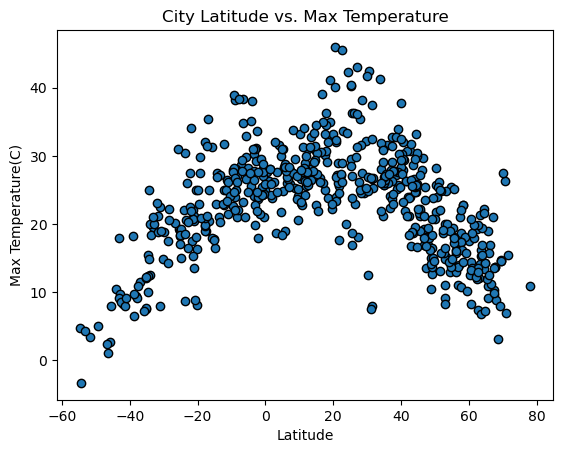

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(cityDataDF['Lat'], cityDataDF['Max Temp'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

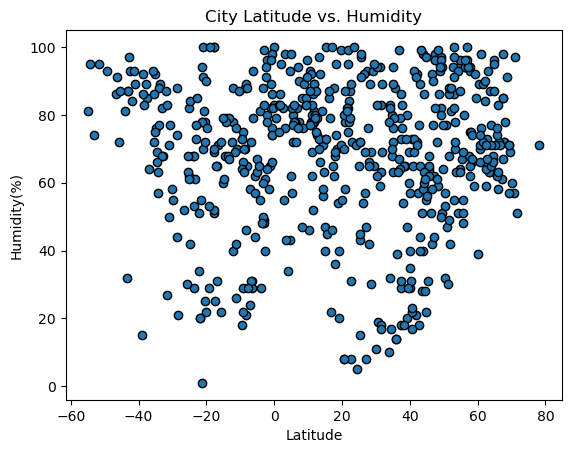

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(cityDataDF['Lat'], cityDataDF['Humidity'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

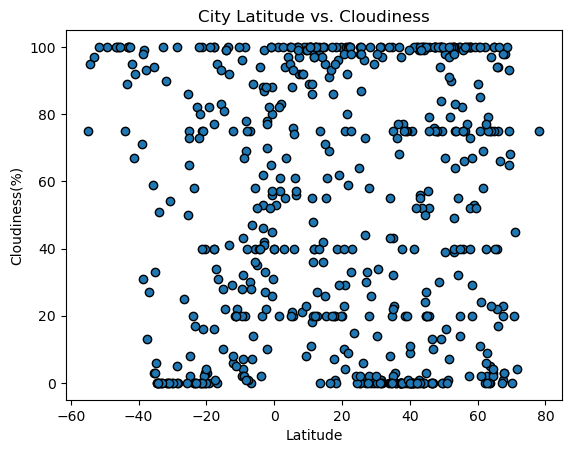

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(cityDataDF['Lat'], cityDataDF['Cloudiness'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

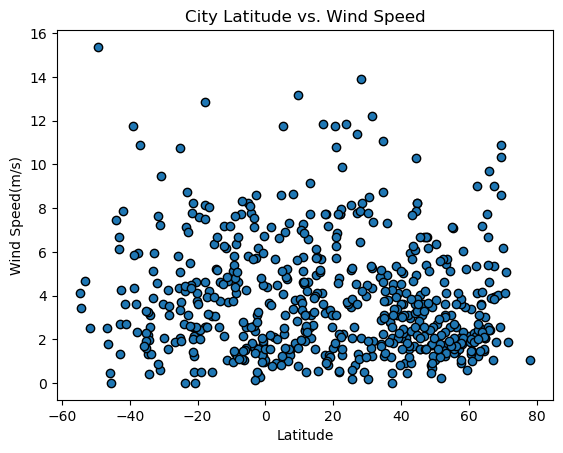

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(cityDataDF['Lat'], cityDataDF['Wind Speed'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def linReg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values
def lineFunc(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return line_eq



In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northHemiDF = cityDataDF.loc[cityDataDF["Lat"] >= 0]

# Display sample data
northHemiDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,7.46,73,2,1.25,RU,1691690000
1,alo,7.4178,6.7371,25.84,90,97,1.51,NG,1691645201
5,nyborg,55.3127,10.7896,19.40,67,82,7.10,DK,1691638804
6,peace river,56.2501,-117.2860,16.17,94,75,2.57,CA,1691669352
8,dabhol,17.6000,73.1667,24.99,88,7,1.30,IN,1691628523


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southHemiDF = cityDataDF.loc[cityDataDF["Lat"] < 0]

# Display sample data
southHemiDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,4.81,81,75,4.12,AR,1691669126
3,saint-leu,-21.1500,55.2833,20.48,91,16,1.21,RE,1691635537
4,invercargill,-46.4000,168.3500,1.12,91,100,1.79,NZ,1691697271
7,port-aux-francais,-49.3500,70.2167,5.11,93,100,15.38,TF,1691634933
11,avarua,-21.2078,-159.7750,22.03,94,75,8.23,CK,1691687133


###  Temperature vs. Latitude Linear Regression Plot

Text(44, 40, 'y = -0.25x + 32.77')

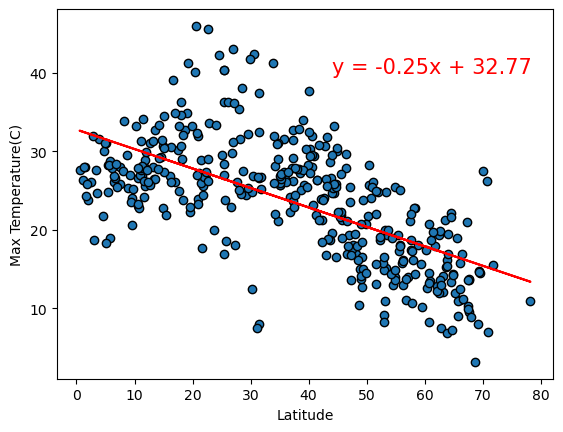

In [47]:
# define x & y
x_values = northHemiDF['Lat']
y_values = northHemiDF['Max Temp']


# Plot on Northern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(44,40),fontsize=15,color="red")

Text(-55, 30, 'y = 0.46x + 29.91')

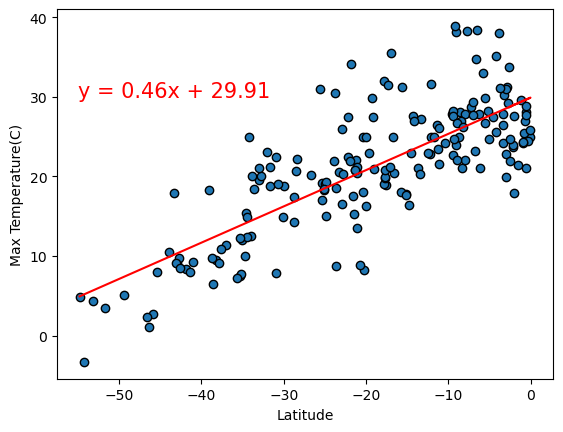

In [53]:
# define x & y
x_values = southHemiDF['Lat']
y_values = southHemiDF['Max Temp']


# Plot on Southern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(45, 15, 'y = -0.01x + 69.41')

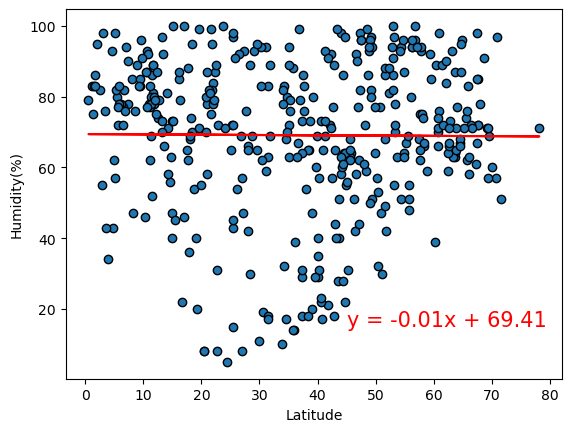

In [55]:
# define x & y
x_values = northHemiDF['Lat']
y_values = northHemiDF['Humidity']


# PLot on Northern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

Text(-55, 37, 'y = -0.28x + 61.73')

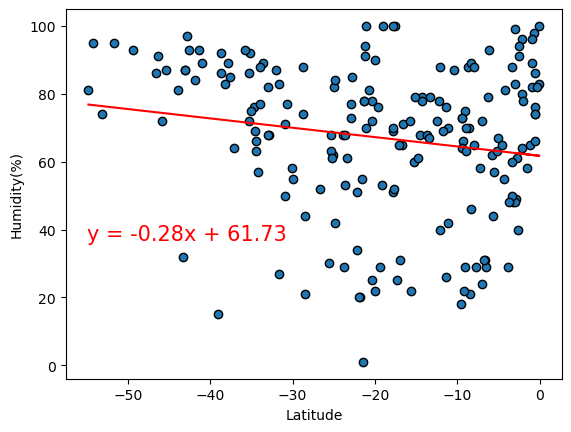

In [58]:
# define x & y
x_values = southHemiDF['Lat']
y_values = southHemiDF['Humidity']


# PLot on Southern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,37),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(30, 59, 'y = -0.18x + 60.41')

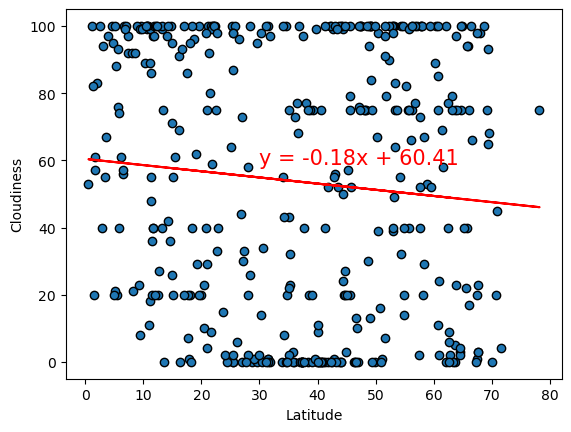

In [63]:
# define x & y
x_values = northHemiDF['Lat']
y_values = northHemiDF['Cloudiness']


# PLot on Northern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,59),fontsize=15,color="red")

Text(-55, 37, 'y = -0.3x + 40.8')

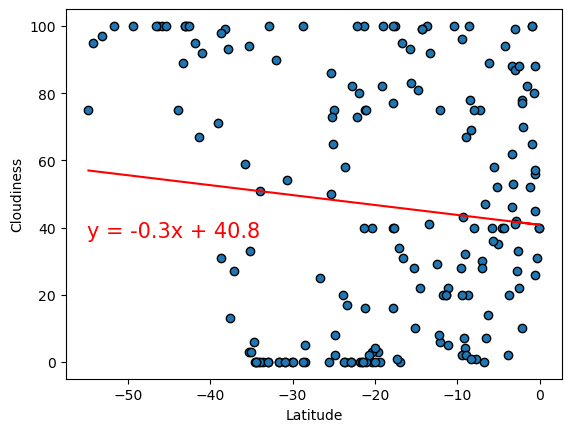

In [60]:
# define x & y
x_values = southHemiDF['Lat']
y_values = southHemiDF['Cloudiness']


# PLot on Southern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,37),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(40, 12, 'y = -0.02x + 4.34')

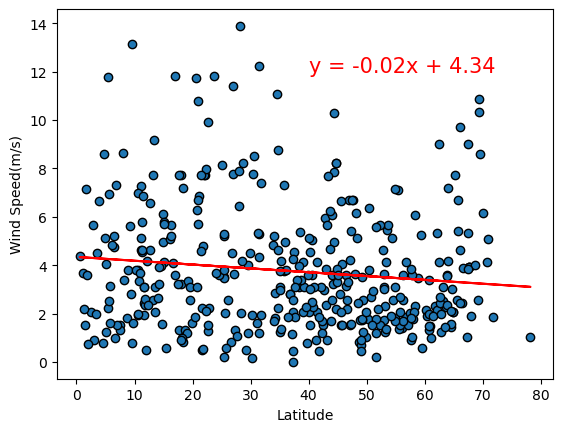

In [66]:
# define x & y
x_values = northHemiDF['Lat']
y_values = northHemiDF['Wind Speed']


# PLot on Northern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

Text(-45, 14, 'y = -0.02x + 3.65')

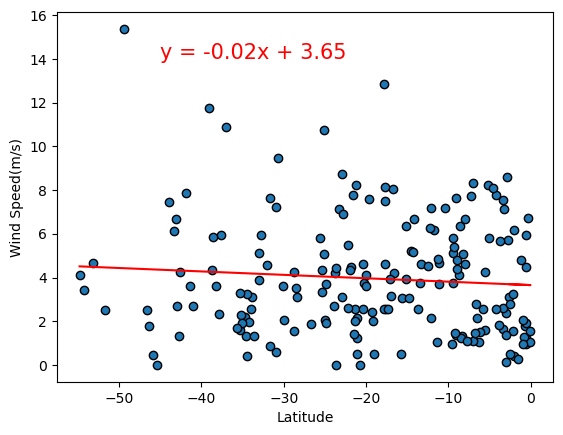

In [68]:
# define x & y
x_values = southHemiDF['Lat']
y_values = southHemiDF['Wind Speed']


# PLot on Southern Hemisphere
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Call linear regression function
regress_values = linReg(x_values, y_values)
line_eq = lineFunc(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,14),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE